In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

In [7]:
# Load the two images
frame1 = cv2.imread('./frames_two_seconds_apart/1.jpg')
frame2 = cv2.imread('./frames_two_seconds_apart/2.jpg')

# Convert frames to grayscale
gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

In [8]:
# Initialize SIFT detector
sift = cv2.SIFT_create()

In [9]:
# Find keypoints and descriptors in both images
keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

In [10]:
# Match keypoints between the two images based on descriptors
bf = cv2.BFMatcher()
matches = bf.match(descriptors1, descriptors2)

In [11]:
# Compute the sum of squared differences (SSD) between SIFT descriptors for matched keypoints
ssd = 0
for match in matches:
    kp1_idx = match.queryIdx
    kp2_idx = match.trainIdx
    sift_descriptor1 = descriptors1[kp1_idx]
    sift_descriptor2 = descriptors2[kp2_idx]
    ssd += np.sum((sift_descriptor1 - sift_descriptor2) ** 2)

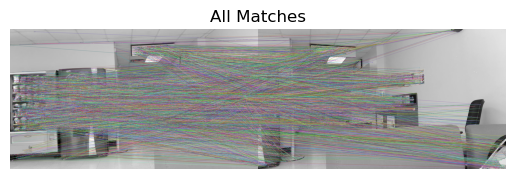

In [23]:
# Draw all matches.
img_matches = cv2.drawMatches(gray1, keypoints1, gray2, keypoints2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Convert BGR image to RGB for matplotlib
img_matches = cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB)

# Show the matches
plt.imshow(img_matches)
plt.title('All Matches')
plt.axis('off')
plt.show()

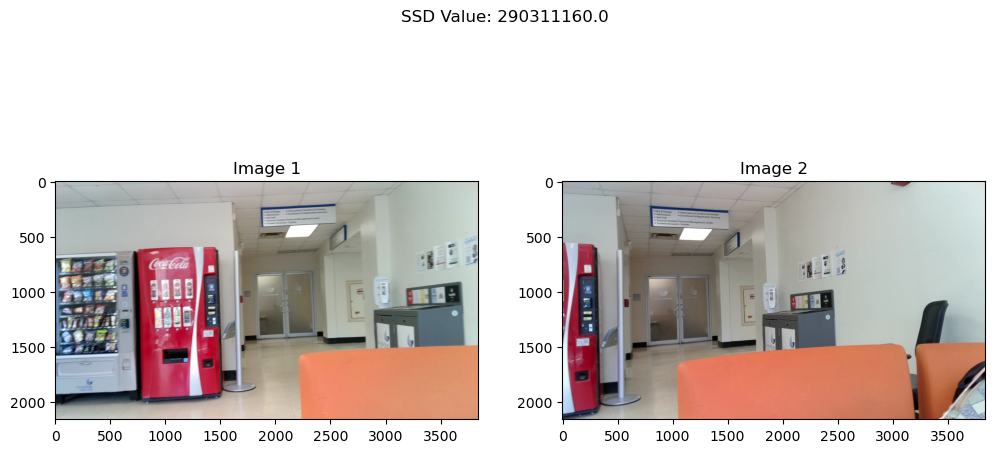

In [24]:
# Display the images and the SSD value
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB))
plt.title('Image 1')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB))
plt.title('Image 2')
plt.suptitle(f'SSD Value: {ssd}')
plt.show()

In [25]:
# PartB
# Extract matched keypoints
matched_keypoints1 = np.array([keypoints1[match.queryIdx].pt for match in matches]).reshape(-1, 1, 2)
matched_keypoints2 = np.array([keypoints2[match.trainIdx].pt for match in matches]).reshape(-1, 1, 2)

In [26]:
# Compute the homography matrix using RANSAC
homography_matrix, _ = cv2.findHomography(matched_keypoints1, matched_keypoints2, cv2.RANSAC)

In [27]:
# Compute the inverse of the homography matrix
inverse_homography_matrix = np.linalg.inv(homography_matrix)

In [28]:
print("Homography Matrix:")
print(homography_matrix)
print("\nInverse Homography Matrix:")
print(inverse_homography_matrix)

Homography Matrix:
[[ 1.88429228e+00 -2.28557892e+00  1.84413709e+03]
 [ 1.53465756e+00 -1.83742261e+00  1.47838976e+03]
 [ 1.03229737e-03 -1.24000197e-03  1.00000000e+00]]

Inverse Homography Matrix:
[[-5.85740815e+01 -1.60409815e+01  1.31733459e+05]
 [-1.18355482e+02 -2.69581938e+02  6.16810912e+05]
 [-8.62951601e-02 -3.17723071e-01  6.29858641e+02]]
